# Load Data

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import plotly.express as px

pd.set_option("display.max_columns", None)

In [ ]:
data_path = "../../data/Wish_Kaggle_Data/"
summer_products = pd.read_csv(data_path + "summer-products-with-rating-and-performance_2020-08.csv")
print(summer_products.shape)
summer_products.head()

(1573, 43)


,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [ ]:
summer_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
summer_products.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,1573,1201,Nouvelle mode d'été femmes robe décontractée c...,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title_orig,1573,1203,New Fashion Summer Women Casual Dress Round Ne...,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1573.0,NaN,NaN,NaN,8.325372,3.93203,1.0,5.81,8.0,11.0,49.0
retail_price,1573.0,NaN,NaN,NaN,23.28862,30.357863,1.0,7.0,10.0,26.0,252.0
currency_buyer,1573,1,EUR,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
units_sold,1573.0,NaN,NaN,NaN,4339.005086,9356.539302,1.0,100.0,1000.0,5000.0,100000.0
uses_ad_boosts,1573.0,NaN,NaN,NaN,0.432931,0.495639,0.0,0.0,0.0,1.0,1.0
rating,1573.0,NaN,NaN,NaN,3.820896,0.515374,1.0,3.55,3.85,4.11,5.0
rating_count,1573.0,NaN,NaN,NaN,889.65925,1983.928834,0.0,24.0,150.0,855.0,20744.0
rating_five_count,1528.0,NaN,NaN,NaN,442.263743,980.20327,0.0,12.0,79.0,413.5,11548.0


# Variable Types (as per dtypes)

In [ ]:
summer_products.select_dtypes(include="object").columns

Index(['title', 'title_orig', 'currency_buyer', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_id', 'merchant_profile_picture',
       'product_url', 'product_picture', 'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [ ]:
summer_products.select_dtypes(include=["int64", "float64"]).columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture'],
      dtype='object')

# Data Cleaning

## Drop Irrelevant Columns

Irrelevant because:

(Object dtype)
- title: contains product title in French
- title_orig: contains product title in English
- merchant_title: contains name of the merchant
- merchant_name: same info as merchant_title
- merchant_info_subtitle: contains overview of the seller's stats for the user
- merchant_profile_picture: contains url to merchant's profile picture
- product_url: url to product description
- product_picture: url to product picture
- theme: single value for the whole column ("summer")
- crawl_month: single value for the whole column ("2020-08")
- currency_buyer: single value for the whole column ("EURO")
- urgency_text: same info contained in "has_urgency_banner" column


(Numerical dtype)

The next 5 columns are not required because we are using "rating" column which contains sum of these 5 columns
- rating_five_count: count of 5 star ratings received
- rating_four_count: count of 4 star ratings received
- rating_three_count: count of 3 star ratings received
- rating_two_count: count of 2 star ratings received
- rating_one_count: count of 1 star ratings received

In [ ]:
print(len(summer_products.columns))
summer_products.columns

43


Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [ ]:
str_cols_to_drop = ['title', 'title_orig',
                    'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_profile_picture',
                    'product_url', 'product_picture',
                    'theme', 'crawl_month', 'currency_buyer', 'urgency_text']

num_cols_to_drop = ['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']
filtered_data1 = summer_products.drop(columns=str_cols_to_drop + num_cols_to_drop)
print(filtered_data1.shape)
filtered_data1.columns

(1573, 26)


Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'origin_country', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture', 'product_id'],
      dtype='object')

## Drop Duplicate Rows

In [ ]:
filtered_data1.drop_duplicates(keep='first', inplace=True)
filtered_data1.shape

(1539, 26)

## Handling Rows with Missing Values

In [ ]:
filtered_data1.isna().sum(axis=0)

price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1071
origin_country                    16
merchant_rating_count              0
merchant_rating                    0
merchant_id                        0
merchant_has_profile_picture       0
product_id                         0
dtype: int64

### Replacing nulls in has_urgency_banner by 0

In [ ]:
# seems like missing values represent products that  have has_urgency_banner=0
filtered_data1["has_urgency_banner"].value_counts()

has_urgency_banner
1.0    468
Name: count, dtype: int64

In [ ]:
filtered_data1.fillna({"has_urgency_banner": 0}, inplace=True)
filtered_data1.isna().sum(axis=0)

price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                   41
product_variation_size_id       14
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
has_urgency_banner               0
origin_country                  16
merchant_rating_count            0
merchant_rating                  0
merchant_id                      0
merchant_has_profile_picture     0
product_id                       0
dtype: int64

### Dropping the remaining null containing rows

In [ ]:
print(filtered_data1.shape)
filtered_data1.dropna(inplace=True)
print(filtered_data1.shape)

(1539, 26)
(1470, 26)


In [ ]:
filtered_data1.isna().sum(axis=0)

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_id                     0
merchant_has_profile_picture    0
product_id                      0
dtype: int64

# EDA

## Unique Values Per Column

In [ ]:
filtered_data2 = filtered_data1.copy(deep=True)

uniq_values_per_col = []
for c in filtered_data2.columns:
    uniq_values_per_col.append((c, len(filtered_data2[c].unique())))

sorted(uniq_values_per_col, key= lambda x:x[-1])

[('uses_ad_boosts', 2),
 ('badge_local_product', 2),
 ('badge_product_quality', 2),
 ('badge_fast_shipping', 2),
 ('shipping_is_express', 2),
 ('has_urgency_banner', 2),
 ('merchant_has_profile_picture', 2),
 ('badges_count', 3),
 ('origin_country', 6),
 ('shipping_option_price', 8),
 ('inventory_total', 8),
 ('shipping_option_name', 14),
 ('units_sold', 15),
 ('product_variation_inventory', 48),
 ('product_variation_size_id', 91),
 ('countries_shipped_to', 92),
 ('product_color', 101),
 ('retail_price', 102),
 ('price', 119),
 ('rating', 188),
 ('rating_count', 727),
 ('merchant_rating_count', 869),
 ('merchant_rating', 902),
 ('merchant_id', 908),
 ('tags', 1172),
 ('product_id', 1277)]

## Setting bool dtype for binary columns

In [ ]:
bool_cols = ['uses_ad_boosts', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
             'shipping_is_express', 'has_urgency_banner', 'merchant_has_profile_picture']

for c in bool_cols:
    filtered_data2[c] = filtered_data2[c].astype(bool)

filtered_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1572
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1470 non-null   float64
 1   retail_price                  1470 non-null   int64  
 2   units_sold                    1470 non-null   int64  
 3   uses_ad_boosts                1470 non-null   bool   
 4   rating                        1470 non-null   float64
 5   rating_count                  1470 non-null   int64  
 6   badges_count                  1470 non-null   int64  
 7   badge_local_product           1470 non-null   bool   
 8   badge_product_quality         1470 non-null   bool   
 9   badge_fast_shipping           1470 non-null   bool   
 10  tags                          1470 non-null   object 
 11  product_color                 1470 non-null   object 
 12  product_variation_size_id     1470 non-null   object 
 13  product_

## Class Imbalance in Binary Columns

Except for uses_ad_boosts and has_urgency_banner, the remaining 5 binary columns have a very high class imbalance.

In [ ]:
for c in bool_cols:
    print(filtered_data2[c].value_counts(normalize=True), "\n\n")

uses_ad_boosts
False    0.560544
True     0.439456
Name: proportion, dtype: float64 


badge_local_product
False    0.983673
True     0.016327
Name: proportion, dtype: float64 


badge_product_quality
False    0.929252
True     0.070748
Name: proportion, dtype: float64 


badge_fast_shipping
False    0.988435
True     0.011565
Name: proportion, dtype: float64 


shipping_is_express
False    0.998639
True     0.001361
Name: proportion, dtype: float64 


has_urgency_banner
False    0.697959
True     0.302041
Name: proportion, dtype: float64 


merchant_has_profile_picture
False    0.854422
True     0.145578
Name: proportion, dtype: float64 




## Drop Binary Columns with High Class Imbalance

In [ ]:
# using 90% as cutoff for classifying a binary col as highly imbalanced
bool_cols_high_class_imbalance = [c for c in bool_cols if c not in ['uses_ad_boosts', 'has_urgency_banner', 'merchant_has_profile_picture']]
print(bool_cols_high_class_imbalance, "\n\n")


print(filtered_data2.shape)
filtered_data2.drop(columns = bool_cols_high_class_imbalance, inplace=True)
filtered_data2.shape

['badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'shipping_is_express'] 


(1470, 26)


(1470, 22)

## Using Distribution of Binary Cols to check for Significance with Outcome Variable

**"merchant_has_profile_picture"** seems to have a significant relationship but neither of these two seem to have a significant relationship with Sales
- uses_ad_boosts
- has_urgency_banner


In [ ]:
bool_cols = [c for c in bool_cols if c not in bool_cols_high_class_imbalance]
print(bool_cols)


for col in bool_cols:
    fig = px.box(filtered_data2, x=col, y="units_sold", title=f"Box Plot of Units Sold by {col}")
    fig.show()

['uses_ad_boosts', 'has_urgency_banner', 'merchant_has_profile_picture']


## Distribution of levels in Non-Binary Categorical Columns

In [ ]:
filtered_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1572
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1470 non-null   float64
 1   retail_price                  1470 non-null   int64  
 2   units_sold                    1470 non-null   int64  
 3   uses_ad_boosts                1470 non-null   bool   
 4   rating                        1470 non-null   float64
 5   rating_count                  1470 non-null   int64  
 6   badges_count                  1470 non-null   int64  
 7   tags                          1470 non-null   object 
 8   product_color                 1470 non-null   object 
 9   product_variation_size_id     1470 non-null   object 
 10  product_variation_inventory   1470 non-null   int64  
 11  shipping_option_name          1470 non-null   object 
 12  shipping_option_price         1470 non-null   int64  
 13  countrie

In [ ]:
object_dtype_cols = filtered_data2.select_dtypes(include="object").columns
object_dtype_cols = [c for c in object_dtype_cols if c not in ['merchant_id', 'product_id']]
object_dtype_cols

['tags',
 'product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'origin_country']

In [ ]:
print("Unique Values Found Per Object dtype Column ")
for c in object_dtype_cols:
    print( c, ": ", len(filtered_data2[c].unique()))

Unique Values Found Per Object dtype Column 
tags :  1172
product_color :  101
product_variation_size_id :  91
shipping_option_name :  14
origin_country :  6


### Drop "tags" column because of high sub-categories count

In [ ]:
print(filtered_data2.shape)
filtered_data2.drop(columns=["tags"], inplace=True)
filtered_data2.shape

(1470, 22)


(1470, 21)

In [ ]:
object_dtype_cols.remove("tags")

for col in object_dtype_cols:
    value_counts = filtered_data2[col].value_counts()
    fig = px.bar(value_counts, x=value_counts.index, y=value_counts.values, title=f"Distribution of {col}", labels={'x': col, 'y': 'Count'})
    fig.show()

## Grouping Categorical Columns' levels with low counts into a separate category of their own

In [ ]:
print(filtered_data2.shape, "\n\n")

filtered_data3 = filtered_data2.copy(deep=True)

for c in object_dtype_cols:
    print(filtered_data3[c].value_counts(), "\n\n")

(1470, 21) 


product_color
black                  290
white                  237
yellow                 101
pink                    97
blue                    95
                      ... 
orange & camouflage      1
claret                   1
lightgray                1
gray & white             1
gold                     1
Name: count, Length: 101, dtype: int64 


product_variation_size_id
S                  613
XS                 339
M                  192
XXS                 90
L                   48
                  ... 
X   L                1
25                   1
Pack of 1            1
S Diameter 30cm      1
SIZE S               1
Name: count, Length: 91, dtype: int64 


shipping_option_name
Livraison standard         1408
Standard Shipping            20
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Standardversand               3
Standardowa wysyłka           3
Стандартная доставка          3
Stan

### Grouping "product_color"

In [ ]:
counts_prod_color = filtered_data3["product_color"].value_counts()
# product_color values that appear less than or = 50 times in the filtered_data3
print((counts_prod_color <= 50).sum())
print((counts_prod_color > 50).sum(), "\n\n")


lesser_frequency_prod_colors = counts_prod_color[counts_prod_color <= 50]
print(lesser_frequency_prod_colors, "\n\n")


lesser_frequency_prod_colors = lesser_frequency_prod_colors.index.tolist()
print(lesser_frequency_prod_colors, "\n\n")


replacement_values = ["Less Frequent Color"]*len(lesser_frequency_prod_colors)
filtered_data3["product_color"] = filtered_data3["product_color"].replace(lesser_frequency_prod_colors, replacement_values)
print("Distribution of colors post-grouping")
filtered_data3["product_color"].value_counts()

92
9 


product_color
armygreen              31
orange                 27
navyblue               27
winered                27
multicolor             20
                       ..
orange & camouflage     1
claret                  1
lightgray               1
gray & white            1
gold                    1
Name: count, Length: 92, dtype: int64 


['armygreen', 'orange', 'navyblue', 'winered', 'multicolor', 'beige', 'lightblue', 'khaki', 'white & green', 'gray', 'rosered', 'skyblue', 'brown', 'darkblue', 'coffee', 'rose', 'floral', 'lightpink', 'black & green', 'leopard', 'Black', 'fluorescentgreen', 'camouflage', 'White', 'lightgreen', 'orange-red', 'black & white', 'applegreen', 'black & blue', 'navy blue', 'lightred', 'Pink', 'navy', 'black & yellow', 'pink & blue', 'wine', 'lakeblue', 'watermelonred', 'camel', 'pink & white', 'burgundy', 'apricot', 'pink & grey', 'whitefloral', 'lightyellow', 'pink & black', 'Army green', 'mintgreen', 'coolblack', 'dustypink', 'white & black', 'leop

product_color
Less Frequent Color    354
black                  290
white                  237
yellow                 101
pink                    97
blue                    95
red                     90
green                   84
grey                    70
purple                  52
Name: count, dtype: int64

### Grouping "product_variation_size_id"

**Idea:** Convert everything into the Small, Medium, Large scale. And everything else assign One Size/Unknown

In [ ]:
filtered_data3["product_variation_size_id"].isna().sum()

np.int64(0)

In [ ]:
counts_prod_variation = filtered_data3["product_variation_size_id"].value_counts()
counts_prod_variation

product_variation_size_id
S                  613
XS                 339
M                  192
XXS                 90
L                   48
                  ... 
X   L                1
25                   1
Pack of 1            1
S Diameter 30cm      1
SIZE S               1
Name: count, Length: 91, dtype: int64

In [ ]:
size_mappings = pd.read_excel('product_variation_size_mapping.xlsx')
size_mappings.head()

,product_variation_size_id,New Label
0,One Size,One Size
1,1,One Size
2,choose a size,One Size
3,Base & Top & Matte Top Coat,One Size
4,Round,One Size


In [ ]:
def map_size(x):
    size_dict = size_mappings.set_index('product_variation_size_id')['New Label'].to_dict()
    return size_dict.get(x, 'One Size')

filtered_data3['product_variation_size_id'] = (
    filtered_data3['product_variation_size_id']
      .map(map_size)
)

print(filtered_data3["product_variation_size_id"].isna().sum(), "\n\n")
filtered_data3["product_variation_size_id"].value_counts()

0 




product_variation_size_id
S           671
XS          359
M           204
XXS          97
L            54
One Size     21
XXL          19
XL           19
XXXXL        10
XXXS          6
XXXXXL        5
XXXL          4
XXXXXXL       1
Name: count, dtype: int64

In [ ]:
# reduce further to S M L and One Size
condense_map = {
    # all “small” variants → “S”
    "XXXS": "S", "XXS": "S", "XS": "S", "S": "S",
    # the one true medium
    "M":    "M",
    # all “large” variants → “L”
    "L":    "L", "XL": "L", "XXL": "L",
    "XXXL": "L", "XXXXL": "L", "XXXXXL": "L", "XXXXXXL": "L"
}

filtered_data3['product_variation_size_id'] = (
    filtered_data3['product_variation_size_id']
      .replace(condense_map)            # map known → S/M/L
      .fillna('One Size')       # everything else → catch‐all
)


print(filtered_data3["product_variation_size_id"].isna().sum(), "\n\n")


# Final Size Cleaned-up
filtered_data3['product_variation_size_id'].value_counts()

0 




product_variation_size_id
S           1133
M            204
L            112
One Size      21
Name: count, dtype: int64

In [ ]:
print(filtered_data3.isna().sum(axis=0), "\n\n")

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_rating_count           0
merchant_rating                 0
merchant_id                     0
merchant_has_profile_picture    0
product_id                      0
dtype: int64 




### Grouping "shipping_option_name"

In [ ]:
shipping_option_counts = filtered_data3["shipping_option_name"].value_counts()
print(shipping_option_counts, "\n\n")

print("Shipping options appearing less than 20 times ...")
lesser_frequency_shipping_options = shipping_option_counts[shipping_option_counts <= 20 ]
lesser_frequency_shipping_options

shipping_option_name
Livraison standard         1408
Standard Shipping            20
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Standardversand               3
Standardowa wysyłka           3
Стандартная доставка          3
Standart Gönderi              2
การส่งสินค้ามาตรฐาน           2
Livraison Express             2
Spedizione standard           2
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: count, dtype: int64 


Shipping options appearing less than 20 times ...


shipping_option_name
Standard Shipping          20
Envio Padrão                9
Expediere Standard          6
Envío normal                5
الشحن القياسي               4
Standardversand             3
Standardowa wysyłka         3
Стандартная доставка        3
Standart Gönderi            2
การส่งสินค้ามาตรฐาน         2
Livraison Express           2
Spedizione standard         2
ការដឹកជញ្ជូនតាមស្តង់ដារ     1
Name: count, dtype: int64

In [ ]:
lesser_frequency_shipping_options = lesser_frequency_shipping_options.index.tolist()
replacement_values_for_shipping_option = ["Less Frequent Shipping Option"] * len(lesser_frequency_shipping_options)

filtered_data3["shipping_option_name"] = filtered_data3["shipping_option_name"].replace(lesser_frequency_shipping_options, replacement_values_for_shipping_option)
filtered_data3["shipping_option_name"].value_counts()

shipping_option_name
Livraison standard               1408
Less Frequent Shipping Option      62
Name: count, dtype: int64

### Grouping "origin_country"

In [ ]:
origin_country_counts = filtered_data3["origin_country"].value_counts()
print(origin_country_counts, "\n\n")

print("Origin country names appearing less than 30 times ...")
lesser_frequency_origin_countries = origin_country_counts[origin_country_counts <= 30 ]
lesser_frequency_origin_countries

origin_country
CN    1432
US      30
VE       4
SG       2
AT       1
GB       1
Name: count, dtype: int64 


Origin country names appearing less than 30 times ...


origin_country
US    30
VE     4
SG     2
AT     1
GB     1
Name: count, dtype: int64

In [ ]:
lesser_frequency_origin_countries = lesser_frequency_origin_countries.index.tolist()
replacement_values_for_origin_countries = ["Less Frequent Origin Countries"] * len(lesser_frequency_origin_countries)

filtered_data3["origin_country"] = filtered_data3["origin_country"].replace(lesser_frequency_origin_countries, replacement_values_for_origin_countries)
filtered_data3["origin_country"].value_counts()

origin_country
CN                                1432
Less Frequent Origin Countries      38
Name: count, dtype: int64

### Converting "origin_country" and "shipping_option_name" to Binary Cols

In [ ]:
filtered_data3["origin_country_CN"] = np.where(filtered_data3["origin_country"]=='CN', 1, 0)
filtered_data3["origin_country_CN"] = filtered_data3["origin_country_CN"].astype(bool)
filtered_data3["origin_country_CN"].value_counts()

origin_country_CN
True     1432
False      38
Name: count, dtype: int64

In [ ]:
filtered_data3["shipping_option_Livraison"] = np.where(filtered_data3["shipping_option_name"]=='Livraison standard', 1, 0)
filtered_data3["shipping_option_Livraison"] = filtered_data3["shipping_option_Livraison"].astype(bool)
filtered_data3["shipping_option_Livraison"].value_counts()

shipping_option_Livraison
True     1408
False      62
Name: count, dtype: int64

In [ ]:
filtered_data3.drop(columns=["origin_country", "shipping_option_name"], inplace=True)
print(filtered_data3.shape)
filtered_data3.head()

(1470, 21)


,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,origin_country_CN,shipping_option_Livraison
0,16.00,14,100,False,3.76,54,0,white,M,50,4,34,50,True,568,4.128521,595097d6a26f6e070cb878d1,False,5e9ae51d43d6a96e303acdb0,True,True
1,8.00,22,20000,True,3.45,6135,0,green,S,50,2,41,50,True,17752,3.899673,56458aa03a698c35c9050988,False,58940d436a0d3d5da4e95a38,True,True
2,8.00,43,100,False,3.57,14,0,Less Frequent Color,S,1,3,36,50,True,295,3.989831,5d464a1ffdf7bc44ee933c65,False,5ea10e2c617580260d55310a,True,True
3,8.00,8,5000,True,4.03,579,0,black,M,50,2,41,50,False,23832,4.020435,58cfdefdacb37b556efdff7c,False,5cedf17ad1d44c52c59e4aca,True,True
4,2.72,3,100,True,3.10,20,0,yellow,S,1,1,35,50,True,14482,4.001588,5ab3b592c3911a095ad5dadb,False,5ebf5819ebac372b070b0e70,True,True


In [ ]:
filtered_data3.to_csv("../../data/Processed_Data/filtered_data3.csv", index=False)

# OHE and Label Encoding for categorical columns

### Convert bool dtype to int

In [ ]:
filtered_data4 = filtered_data3.copy(deep=True)

print(filtered_data4.info(), "\n\n")

bool_cols = filtered_data4.select_dtypes([bool]).columns.tolist()
print(bool_cols, "\n\n")

for c in bool_cols:
    filtered_data4[c] = filtered_data4[c].astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1572
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1470 non-null   float64
 1   retail_price                  1470 non-null   int64  
 2   units_sold                    1470 non-null   int64  
 3   uses_ad_boosts                1470 non-null   bool   
 4   rating                        1470 non-null   float64
 5   rating_count                  1470 non-null   int64  
 6   badges_count                  1470 non-null   int64  
 7   product_color                 1470 non-null   object 
 8   product_variation_size_id     1470 non-null   object 
 9   product_variation_inventory   1470 non-null   int64  
 10  shipping_option_price         1470 non-null   int64  
 11  countries_shipped_to          1470 non-null   int64  
 12  inventory_total               1470 non-null   int64  
 13  has_urge

## OHE for Nominal (Product Color) column

In [ ]:
cat_cols = filtered_data4.select_dtypes([object]).columns.tolist()
cat_cols

['product_color', 'product_variation_size_id', 'merchant_id', 'product_id']

In [ ]:
# sanity check for duplicates after dropping product_id and merchant_id
filtered_data4.shape
print(len(filtered_data4["product_id"].unique()), "\n\n")

dummy = filtered_data4.drop(columns=["product_id", "merchant_id"])
print(dummy.shape)

dummy.drop_duplicates(keep='first', inplace=True)
print(dummy.shape)

1277 


(1470, 19)
(1470, 19)


In [ ]:
filtered_data4.drop(columns=["product_id", "merchant_id"], inplace=True)
cat_cols = [c for c in cat_cols if c not in ["product_id", "merchant_id"]]
print(cat_cols)

['product_color', 'product_variation_size_id']


In [ ]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse_output=False)
ohe_data = filtered_data4.copy(deep=True).reset_index()


# Fit and transform the data
encoded_data = encoder.fit_transform(ohe_data[["product_color"]])

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["product_color"]))
print(encoded_df.head())


# Concatenate the encoded data with the original data
ohe_data = pd.concat([ohe_data, encoded_df], axis=1)

   product_color_black  product_color_blue  product_color_green  \
0                  0.0                 0.0                  0.0   
1                  0.0                 0.0                  1.0   
2                  0.0                 0.0                  0.0   
3                  1.0                 0.0                  0.0   
4                  0.0                 0.0                  0.0   

   product_color_grey  product_color_pink  product_color_purple  \
0                 0.0                 0.0                   0.0   
1                 0.0                 0.0                   0.0   
2                 0.0                 0.0                   0.0   
3                 0.0                 0.0                   0.0   
4                 0.0                 0.0                   0.0   

   product_color_red  product_color_white  product_color_yellow  
0                0.0                  1.0                   0.0  
1                0.0                  0.0                   0.

In [ ]:
ohe_data.tail()

,index,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,origin_country_CN,shipping_option_Livraison,product_color_black,product_color_blue,product_color_green,product_color_grey,product_color_pink,product_color_purple,product_color_red,product_color_white,product_color_yellow
1465,1568,6.0,9,10000,1,4.08,1367,0,Less Frequent Color,S,50,2,41,50,0,5316,4.224605,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,1569,2.0,56,100,1,3.07,28,0,Less Frequent Color,S,2,1,26,50,1,4435,3.696054,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,1570,5.0,19,100,0,3.71,59,0,white,S,15,2,11,50,0,210,3.961905,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,1571,13.0,11,100,0,2.50,2,0,white,S,36,3,29,50,0,31,3.774194,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1469,1572,7.0,6,100,1,4.07,14,0,red,S,50,2,41,50,0,7023,4.235939,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
ohe_data.drop(columns=["index"], inplace=True)
ohe_data.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_price', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'origin_country_CN',
       'shipping_option_Livraison', 'product_color_black',
       'product_color_blue', 'product_color_green', 'product_color_grey',
       'product_color_pink', 'product_color_purple', 'product_color_red',
       'product_color_white', 'product_color_yellow'],
      dtype='object')

In [ ]:
ohe_data.shape

(1470, 28)

## Label Encoding for Ordinal (Variation_Size) column

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
ohe_data['variation_size_label_encoded'] = label_encoder.fit_transform(ohe_data['product_variation_size_id'])
ohe_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,origin_country_CN,shipping_option_Livraison,product_color_black,product_color_blue,product_color_green,product_color_grey,product_color_pink,product_color_purple,product_color_red,product_color_white,product_color_yellow,variation_size_label_encoded
0,16.00,14,100,0,3.76,54,0,white,M,50,4,34,50,1,568,4.128521,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,8.00,22,20000,1,3.45,6135,0,green,S,50,2,41,50,1,17752,3.899673,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,8.00,43,100,0,3.57,14,0,Less Frequent Color,S,1,3,36,50,1,295,3.989831,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,8.00,8,5000,1,4.03,579,0,black,M,50,2,41,50,0,23832,4.020435,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2.72,3,100,1,3.10,20,0,yellow,S,1,1,35,50,1,14482,4.001588,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3


In [ ]:
# Get the mapping for each size
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)

{'L': np.int64(0), 'M': np.int64(1), 'One Size': np.int64(2), 'S': np.int64(3)}


In [ ]:
# drop color and variation_size cols
print(ohe_data.shape)
ohe_data.drop(columns=cat_cols, inplace=True)
ohe_data.shape

(1470, 29)


(1470, 27)

In [ ]:
ohe_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,origin_country_CN,shipping_option_Livraison,product_color_black,product_color_blue,product_color_green,product_color_grey,product_color_pink,product_color_purple,product_color_red,product_color_white,product_color_yellow,variation_size_label_encoded
0,16.00,14,100,0,3.76,54,0,50,4,34,50,1,568,4.128521,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,8.00,22,20000,1,3.45,6135,0,50,2,41,50,1,17752,3.899673,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,8.00,43,100,0,3.57,14,0,1,3,36,50,1,295,3.989831,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,8.00,8,5000,1,4.03,579,0,50,2,41,50,0,23832,4.020435,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2.72,3,100,1,3.10,20,0,1,1,35,50,1,14482,4.001588,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3


In [ ]:
ohe_data.to_csv("../../data/Processed_Data/filtered_data4.csv", index=False)

# SMOTE (for has_urgency_banner)

In [ ]:

ohe_data["has_urgency_banner"].value_counts(normalize=True)

has_urgency_banner
0    0.697959
1    0.302041
Name: proportion, dtype: float64

In [ ]:
filtered_data5 =  ohe_data.copy(deep=True)

smote_obj = SMOTE(random_state=42, k_neighbors=5)
X = filtered_data5.drop(['has_urgency_banner'], axis=1)
y = filtered_data5['has_urgency_banner']

print(X.shape)

X_res, y_res = smote_obj.fit_resample(X, y)
print(X_res.shape)

(1470, 26)
(2052, 26)


In [ ]:
data_augmented = pd.concat([X_res, y_res], axis=1)
print(data_augmented.shape)
data_augmented.head()

(2052, 27)


,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,origin_country_CN,shipping_option_Livraison,product_color_black,product_color_blue,product_color_green,product_color_grey,product_color_pink,product_color_purple,product_color_red,product_color_white,product_color_yellow,variation_size_label_encoded,has_urgency_banner
0,16.00,14,100,0,3.76,54,0,50,4,34,50,568,4.128521,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,8.00,22,20000,1,3.45,6135,0,50,2,41,50,17752,3.899673,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
2,8.00,43,100,0,3.57,14,0,1,3,36,50,295,3.989831,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
3,8.00,8,5000,1,4.03,579,0,50,2,41,50,23832,4.020435,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,2.72,3,100,1,3.10,20,0,1,1,35,50,14482,4.001588,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1


In [ ]:
print(data_augmented["has_urgency_banner"].value_counts())

has_urgency_banner
1    1026
0    1026
Name: count, dtype: int64


In [ ]:
data_augmented.to_csv("../../data/Processed_Data/filtered_data5.csv", index=False)

# Handling ratings when rating_count == 0

In [ ]:
filtered_data5 = pd.read_csv("../../data/Processed_Data/filtered_data5.csv")
filtered_data5.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,origin_country_CN,shipping_option_Livraison,product_color_black,product_color_blue,product_color_green,product_color_grey,product_color_pink,product_color_purple,product_color_red,product_color_white,product_color_yellow,variation_size_label_encoded,has_urgency_banner
0,16.00,14,100,0,3.76,54,0,50,4,34,50,568,4.128521,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,8.00,22,20000,1,3.45,6135,0,50,2,41,50,17752,3.899673,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
2,8.00,43,100,0,3.57,14,0,1,3,36,50,295,3.989831,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1
3,8.00,8,5000,1,4.03,579,0,50,2,41,50,23832,4.020435,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,2.72,3,100,1,3.10,20,0,1,1,35,50,14482,4.001588,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1


In [ ]:
def handle_ratings_with_zero_rating_count(df):
    # product ratings
    print("Rows with rating=5 but rating_count=0: ", len(df[(df["rating"] == 5) & (df["rating_count"] == 0)]))
    df.loc[df["rating_count"]==0, "rating"] = 0

    # merchant ratings
    print("Rows with merchant_rating=5 but merchant_rating_count=0: ", len(df[(df["merchant_rating"] == 5) & (df["merchant_rating_count"] == 0)]))
    df.loc[df["merchant_rating_count"]==0, "merchant_rating"] = 0


In [ ]:
handle_ratings_with_zero_rating_count(filtered_data5)

Rows with rating=5 but rating_count=0:  41
Rows with merchant_rating=5 but merchant_rating_count=0:  1


In [ ]:

filtered_data5[(filtered_data5["rating"] == 5) & (filtered_data5["rating_count"] == 0)]

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,origin_country_CN,shipping_option_Livraison,product_color_black,product_color_blue,product_color_green,product_color_grey,product_color_pink,product_color_purple,product_color_red,product_color_white,product_color_yellow,variation_size_label_encoded,has_urgency_banner


In [ ]:
filtered_data5.to_csv("../../data/Processed_Data/filtered_data6.csv", index=False)

# Correlation Matrix

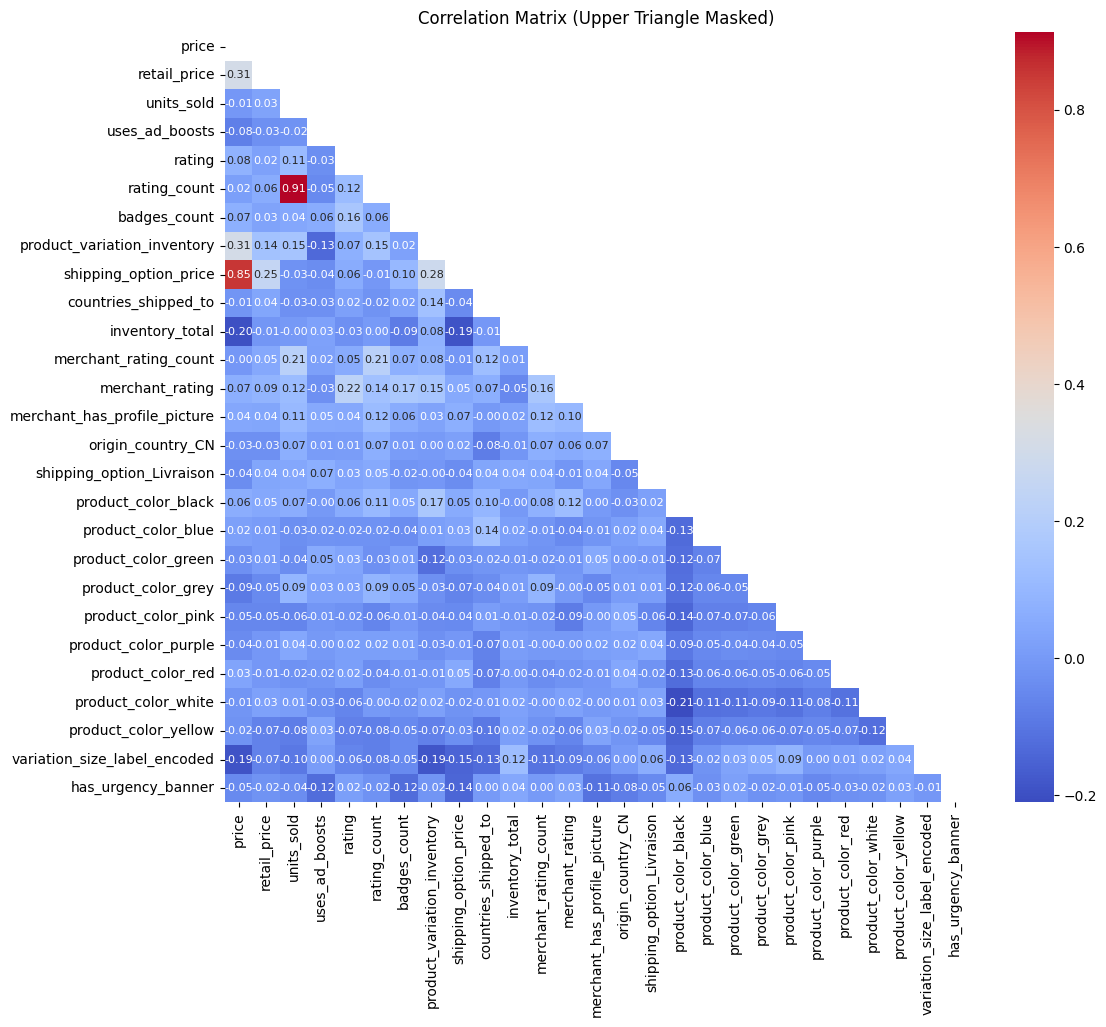

In [ ]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = filtered_data5.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with adjusted annotation font size
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={"size": 8})
plt.title('Correlation Matrix (Upper Triangle Masked)')
plt.show()